<a href="https://colab.research.google.com/github/Shubham96111/Capstone-proj/blob/main/HDS_Project_G12_P2_WaterQuality_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
#Importing the data
path="/content/Waterquality.csv"
data=pd.read_csv(path,encoding='latin-1')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [7]:
#Checking for Null values
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [10]:
data['is_safe'] = data['is_safe'].replace(['#NUM!'],0)

In [11]:
data['is_safe'].value_counts()

0    7084
1     912
0       3
Name: is_safe, dtype: int64

In [12]:
data['ammonia'] = pd.to_numeric(data['ammonia'],errors='coerce').astype('float64')
data['is_safe'] = pd.to_numeric(data['is_safe'],errors='coerce').astype('int64')

In [13]:
data.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [14]:
data.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [15]:
data['ammonia']=data["ammonia"].fillna(np.mean(data["ammonia"]))

In [16]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [17]:
data.shape

(7999, 21)

In [18]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

[1.65 2.32 1.01 1.36 0.92 0.94 2.36 3.93 0.6  0.22 3.27 1.35 1.88 4.93
 2.89 0.61 3.47 2.11 4.88 4.12 0.68 1.15 0.27 4.32 3.31 1.82 3.42 4.41
 4.57 1.69 1.87 2.71 1.63 0.01 4.49 3.52 4.35 2.51 2.34 1.71 3.45 3.37
 3.13 0.29 1.51 1.09 2.68 0.3  0.23 2.55 0.86 0.24 3.63 3.26 0.42 0.77
 0.58 3.82 2.78 3.62 3.88 4.64 2.25 0.54 4.62 2.5  3.08 3.03 2.85 1.38
 2.73 3.02 1.96 2.35 2.45 2.67 1.12 3.3  0.43 1.19 0.85 0.5  4.75 1.89
 3.75 3.32 1.75 2.66 2.76 2.63 0.04 0.88 2.22 4.91 4.8  0.47 1.62 0.09
 4.66 2.74 1.79 4.15 3.78 2.91 4.3  3.24 3.53 3.04 2.21 2.47 1.92 1.22
 2.12 4.19 4.21 4.07 2.56 3.55 3.94 0.8  2.59 3.9  3.15 0.18 3.86 1.25
 2.29 0.07 4.18 4.34 2.39 0.9  0.89 2.4  3.69 4.71 3.36 4.46 4.5  0.57
 2.69 2.17 1.32 5.   2.6  0.35 3.83 2.9  1.56 2.23 3.81 2.75 0.81 4.
 4.08 1.55 2.42 2.99 1.43 1.66 3.38 4.42 3.43 3.65 4.86 2.82 1.05 0.73
 1.21 2.15 3.6  1.73 3.35 0.37 0.79 0.99 1.86 4.84 3.09 1.72 3.29 0.11
 4.04 3.71 3.79 3.05 0.84 1.98 0.59 0.36 1.4  1.46 2.02 0.   0.93 0.78
 4.48 0.

In [19]:
x= data.drop("is_safe", axis=1)
y=data["is_safe"]
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

In [20]:
y.head

<bound method NDFrame.head of 0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7999, dtype: int64>

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

4017    0
2577    0
3693    0
6574    0
7566    0
       ..
238     0
92      1
2977    0
3458    0
3221    0
Name: is_safe, Length: 3200, dtype: int64

In [22]:
logreg = LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [41]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.05268620681874592

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8975

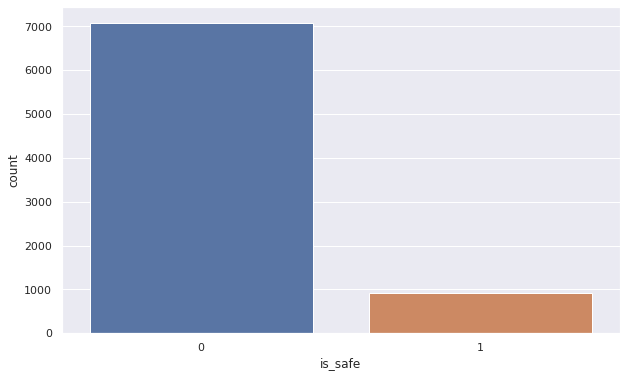

In [44]:
  plt.rcParams['figure.figsize']=(10,6)
  sns.set_style('darkgrid')
  sns.countplot(x='is_safe',data=data)

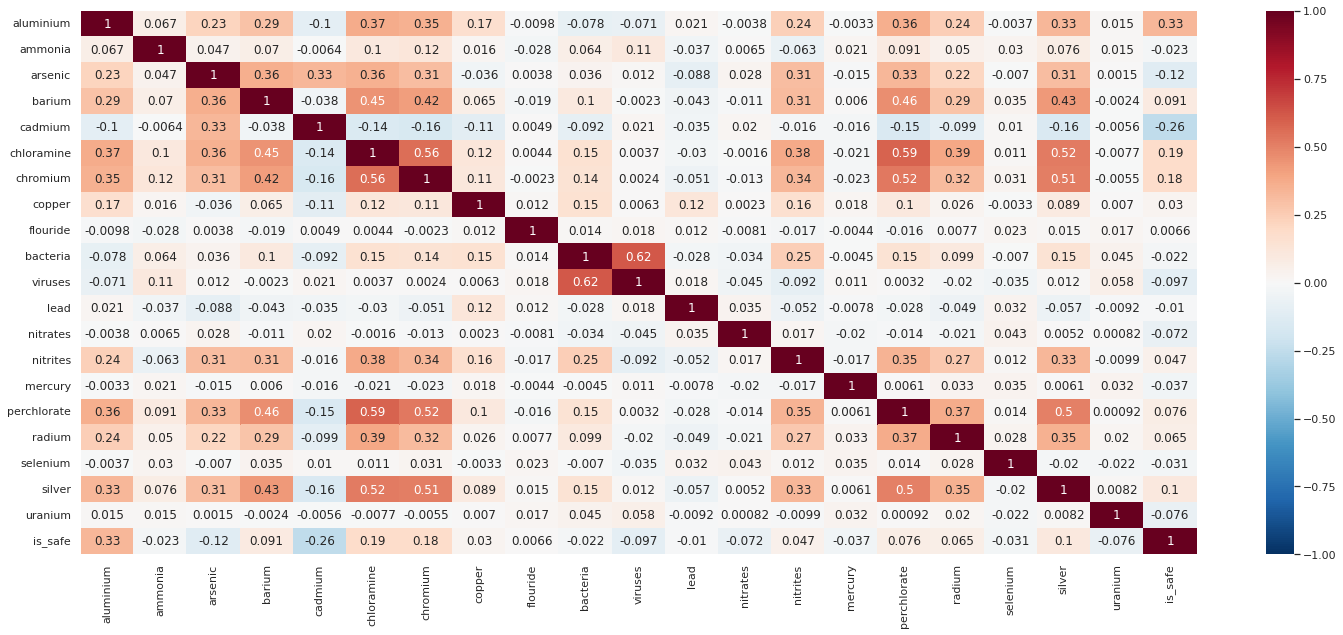

In [45]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

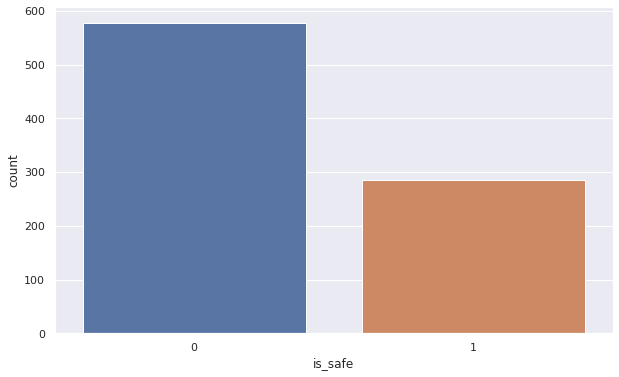

In [46]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.aluminium > 2.8)])

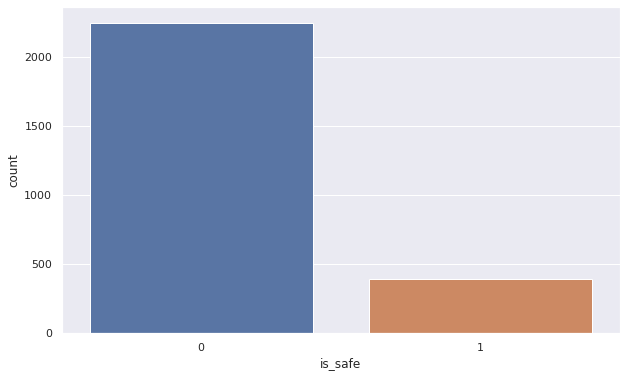

In [47]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.barium>2)])

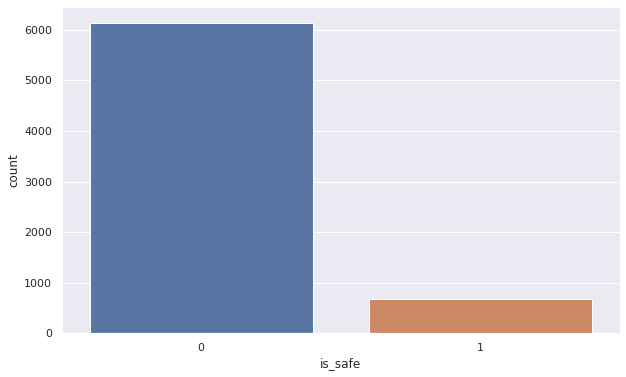

In [48]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.arsenic>0.01)])

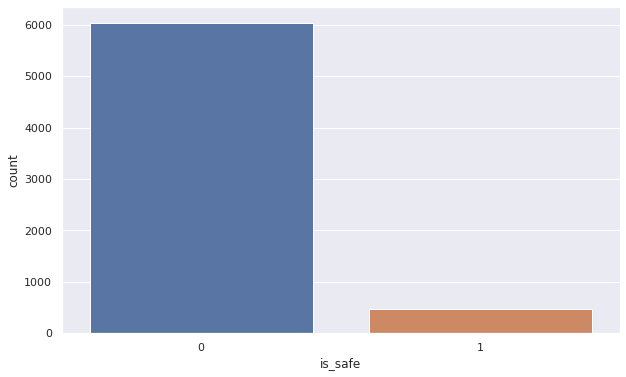

In [49]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.cadmium>0.005)])

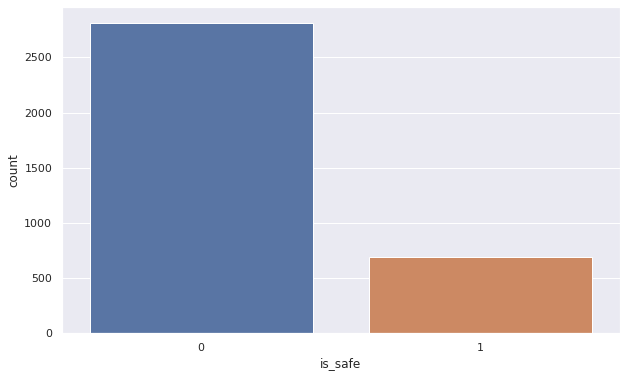

In [50]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.chromium>0.1)])

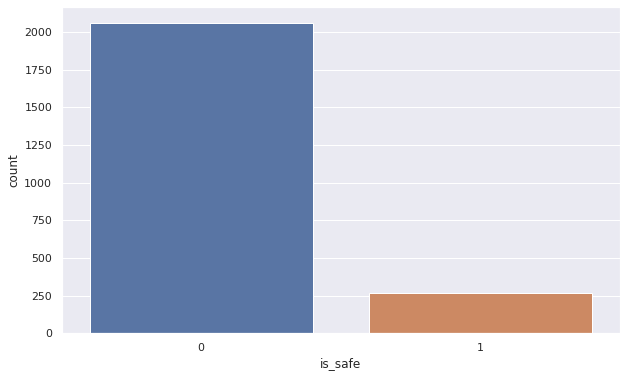

In [51]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.copper>1.3)])

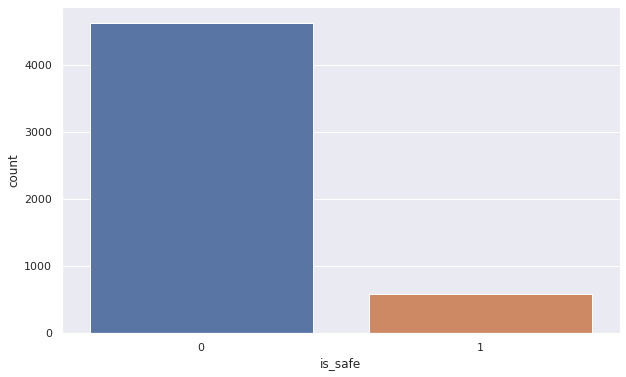

In [52]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.bacteria>0)])

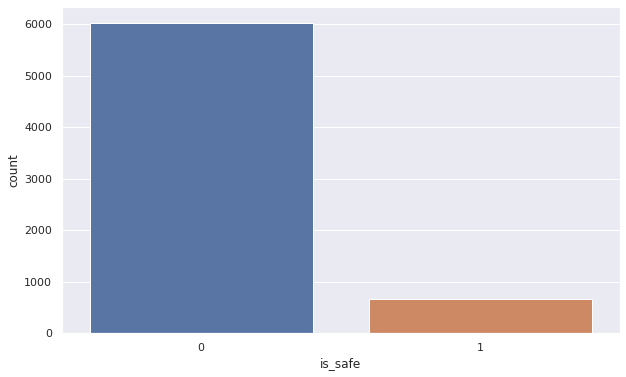

In [53]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.viruses>0)])

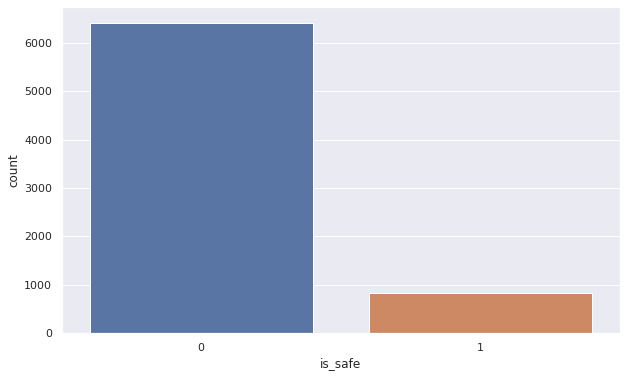

In [54]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.lead>0.015)])

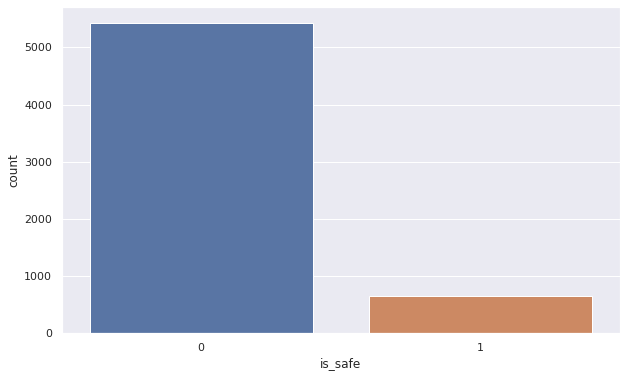

In [55]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.mercury>0.002)])

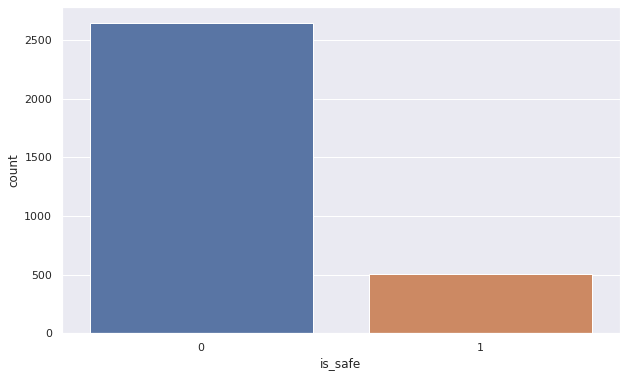

In [56]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.silver>0.1)])

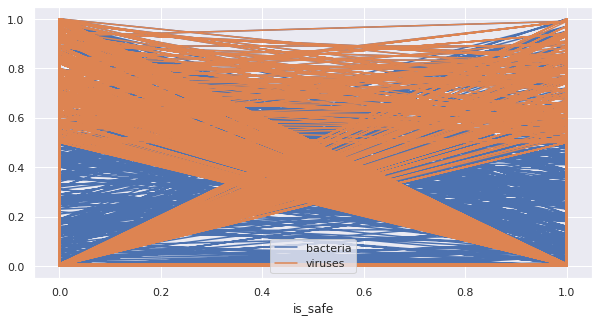

In [57]:
df=pd.DataFrame(data,columns=['bacteria','viruses','is_safe'])
df.plot(x='is_safe',y=['bacteria','viruses'],kind='line',figsize=(10,5))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

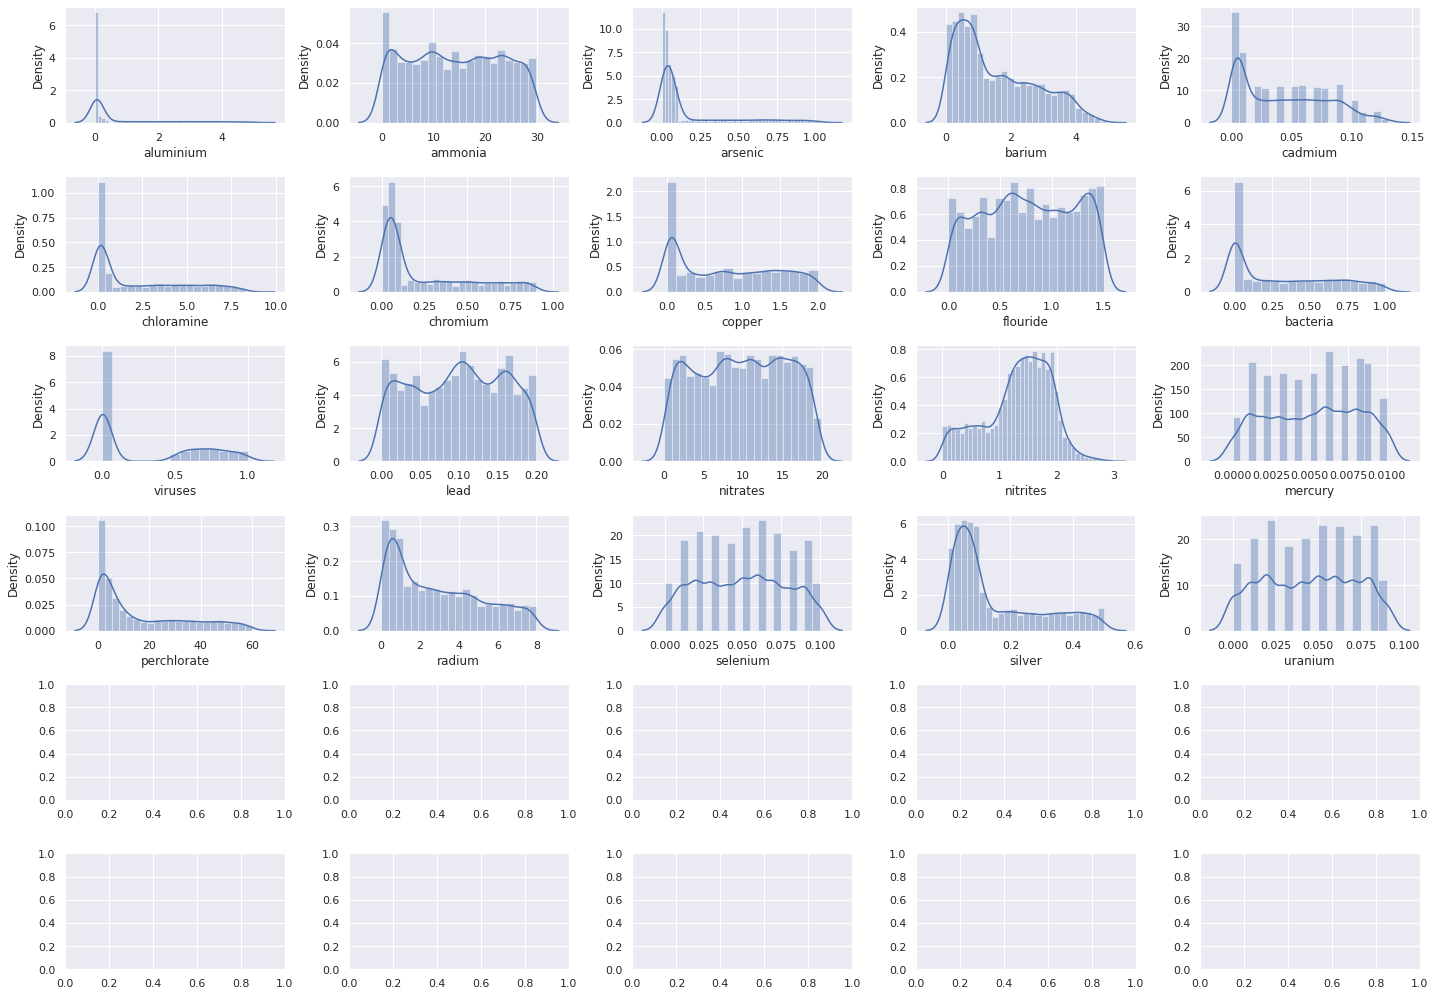

In [58]:
fig, axes = plt.subplots(6, 5, figsize=(20, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(data.columns[:-1]):
  plot = sns.distplot(data[c] ,ax=axes[i])
plt.tight_layout()